# Hospital Readmissions Data Analysis and Recommendations for Reduction

### Background
In October 2012, the US government's Center for Medicare and Medicaid Services (CMS) began reducing Medicare payments for Inpatient Prospective Payment System hospitals with excess readmissions. Excess readmissions are measured by a ratio, by dividing a hospital’s number of “predicted” 30-day readmissions for heart attack, heart failure, and pneumonia by the number that would be “expected,” based on an average hospital with similar patients. A ratio greater than 1 indicates excess readmissions.

### Exercise Directions

In this exercise, you will:
+ critique a preliminary analysis of readmissions data and recommendations (provided below) for reducing the readmissions rate
+ construct a statistically sound analysis and make recommendations of your own 

More instructions provided below. Include your work **in this notebook and submit to your Github account**. 

### Resources
+ Data source: https://data.medicare.gov/Hospital-Compare/Hospital-Readmission-Reduction/9n3s-kdb3
+ More information: http://www.cms.gov/Medicare/medicare-fee-for-service-payment/acuteinpatientPPS/readmissions-reduction-program.html
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [57]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import bokeh.plotting as bkp
from mpl_toolkits.axes_grid1 import make_axes_locatable
from scipy import stats
import seaborn as sns

In [58]:
# read in readmissions data provided
hospital_read_df = pd.read_csv('data/cms_hospital_readmissions.csv')

****
## Preliminary Analysis

In [59]:
# deal with missing and inconvenient portions of data 
clean_hospital_read_df = hospital_read_df[hospital_read_df['Number of Discharges'] != 'Not Available']
clean_hospital_read_df.loc[:, 'Number of Discharges'] = clean_hospital_read_df['Number of Discharges'].astype(int)
clean_hospital_read_df = clean_hospital_read_df.sort_values('Number of Discharges')

C:\Users\robva\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


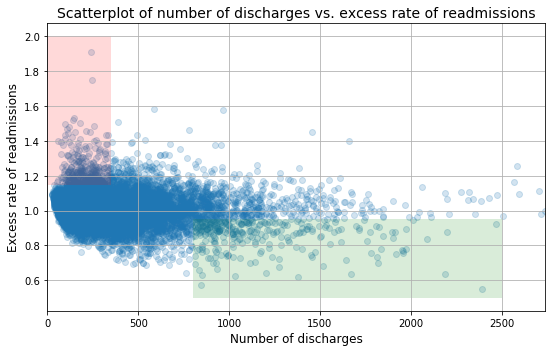

In [60]:
# generate a scatterplot for number of discharges vs. excess rate of readmissions
# lists work better with matplotlib scatterplot function
x = [a for a in clean_hospital_read_df['Number of Discharges'][81:-3]]
y = list(clean_hospital_read_df['Excess Readmission Ratio'][81:-3])

fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x, y,alpha=0.2)

ax.fill_between([0,350], 1.15, 2, facecolor='red', alpha = .15, interpolate=True)
ax.fill_between([800,2500], .5, .95, facecolor='green', alpha = .15, interpolate=True)

ax.set_xlim([0, max(x)])
ax.set_xlabel('Number of discharges', fontsize=12)
ax.set_ylabel('Excess rate of readmissions', fontsize=12)
ax.set_title('Scatterplot of number of discharges vs. excess rate of readmissions', fontsize=14)

ax.grid(True)
fig.tight_layout()

****

## Preliminary Report

Read the following results/report. While you are reading it, think about if the conclusions are correct, incorrect, misleading or unfounded. Think about what you would change or what additional analyses you would perform.

**A. Initial observations based on the plot above**
+ Overall, rate of readmissions is trending down with increasing number of discharges
+ With lower number of discharges, there is a greater incidence of excess rate of readmissions (area shaded red)
+ With higher number of discharges, there is a greater incidence of lower rates of readmissions (area shaded green) 

**B. Statistics**
+ In hospitals/facilities with number of discharges < 100, mean excess readmission rate is 1.023 and 63% have excess readmission rate greater than 1 
+ In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is 0.978 and 44% have excess readmission rate greater than 1 

**C. Conclusions**
+ There is a significant correlation between hospital capacity (number of discharges) and readmission rates. 
+ Smaller hospitals/facilities may be lacking necessary resources to ensure quality care and prevent complications that lead to readmissions.

**D. Regulatory policy recommendations**
+ Hospitals/facilties with small capacity (< 300) should be required to demonstrate upgraded resource allocation for quality care to continue operation.
+ Directives and incentives should be provided for consolidation of hospitals and facilities to have a smaller number of them with higher capacity and number of discharges.

****
### Exercise

Include your work on the following **in this notebook and submit to your Github account**. 

A. Do you agree with the above analysis and recommendations? Why or why not?
   
B. Provide support for your arguments and your own recommendations with a statistically sound analysis:

   1. Setup an appropriate hypothesis test.
   2. Compute and report the observed significance value (or p-value).
   3. Report statistical significance for $\alpha$ = .01. 
   4. Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?
   5. Look at the scatterplot above. 
      - What are the advantages and disadvantages of using this plot to convey information?
      - Construct another plot that conveys the same information in a more direct manner.



You can compose in notebook cells using Markdown: 
+ In the control panel at the top, choose Cell > Cell Type > Markdown
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

*A. Do you agree with the above analysis and recommendations?  Why or why not?*

While the researcher was right to point out that the highest excess readmission rates are at hospitals with small capacities with the opposite being true for hospitals with large capacities, the overall analysis and recommendations are misleading and potentially incorrect.  For instance, there are no formal statistical tests to support the analysis.  This may mean that the results reflect the researcher's subjective assessment and are not empirically-based.  Further, without formal statistical tests, it's not clear if the observations the researcher made will be reproduced in other samples.  With regard to the statistics presented for high- and low-capacity hospitals, even if the differences in excess readmission rates are statistically significant, I'm not convinced that the difference is practically significant.  Finally, the recommendations rest on a few important, though incorrect, assumptions.  The first recommendation assumes that all hospitals with small capacities should devote additional resources to quality care.  However, as the scatterplot shows, there are many hospitals with small capacities that are performing at or below the expected readmission rate of 1.  Therefore, the first recommendation may place an unnecessary burden on many small-capacity hospitals.  The second recommendation assumes that hospital capacity is causing higher excess readmission rates and that eliminating small hospitals will reduce these rates.  However, there may be any number of other factors influencing excess readmission rates.  For instance, it is posible that a third, unobserved factor may be driving the relationship between hospital capacity and excess readmission rates.  As an example, smaller hospitals may be disproportionately located in rural communities whereas larger hospitals tend to be located in urban and suburban communities.  To the extent that people in rural communities disproportionately experience adverse health outcomes due to things like poverty, lack of access to quality primary care, etc., we would expect both the observed variables to be affected by a hospital's geographic location.

*B. Provide support for your arguments and your own recommendations with a statistically sound analysis:*

*1. Setup an appropriate hypothesis test.*

In [61]:
#Test the hypothesis that there is a negative relationship (i.e. correlation/covariance) using a bivariate linear regression model.
#Use listwise deletion on original dateframe
clean_hospital_read_df = clean_hospital_read_df.dropna(how='any', subset=['Excess Readmission Ratio', 'Number of Discharges'])

#Drop a handfull of extreme outliers on number of discharges
clean_hospital_read_df = clean_hospital_read_df[clean_hospital_read_df['Number of Discharges'] < 3000]

#Define variables
y=clean_hospital_read_df['Excess Readmission Ratio']
x=clean_hospital_read_df['Number of Discharges']

#First, test normality of the outcome 
print('Skew:',stats.skew(y, bias=True, nan_policy='omit'))
print('Kurtosis:',stats.kurtosis(y, fisher=False, bias=True, nan_policy='omit'))

#Both skew and kurtosis fall within West et al.'s (1996) recommendations for normality (< abs(2), < abs(7))

#Regress x (number of discharges) on y (excess readmission ratio)
slope, intercept, r, p, stderr = stats.linregress(x,y)
print('slope:', slope)
print('intercept:', intercept)
print('R squared:', r**2)
print('p for H0 of b1 = 0:', p)

Skew: 0.5852678155813058
Kurtosis: 6.629294752159995
slope: -2.8565052943822634e-05
intercept: 1.017947557954422
R squared: 0.008666780103359356
p for H0 of b1 = 0: 1.5022756426615086e-23


*2. Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?*

Although the relationship between excess readmission rates and number of discharges is statistically significant (*p* < .001), the practical significance of this relationship is questionable. For instance, the slope suggests that for a one unit increase in discharges there is an average decrease in the excess readmission rate of .00003.  In other words, for every additional 1,000 discharges, a hospital's excess readmission rate can be expected to decrease by .03.  Additionally, the R square value suggests that hospitals' numbers of discharges are only able to account for roughly 1% of the variance in their excess readmission rates.  
Based on these results, I would recommend that the client take a more nuanced approach to lowering excess readmission rates.  The scatterplot displayed above indicates that a handful of hospitals with low discharges have abnormally high excess readmission rates.  A next step might involve examining differences between hospitals with high and low excess readmission rates, but only among hospitals with low discharges.  This may give a better indication of what is causing high excess readmission rates.

*3. Look at the scatterplot above. What are the advantages and disadvantages of using this plot to convey information?*

The scatterplot has the advantage of displaying the relationship between these variables across the full range of both variables.  However, it does not include any information about how this relationship might be summarized (i.e. a regression line).


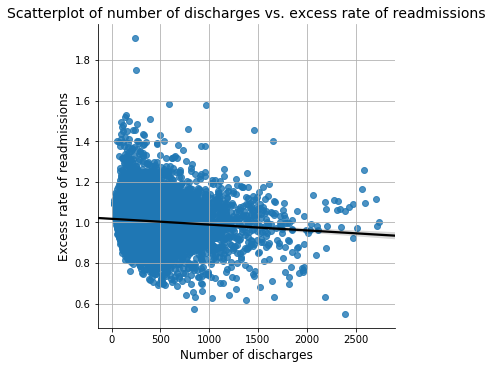

In [70]:
#Construct another plot that conveys the same information in a more direct manner.
plt.close()
sns.lmplot(x='Number of Discharges', y='Excess Readmission Ratio', data=clean_hospital_read_df, line_kws={'color': 'black'})

plt.xlabel('Number of discharges', fontsize=12)
plt.ylabel('Excess rate of readmissions', fontsize=12)
plt.title('Scatterplot of number of discharges vs. excess rate of readmissions', fontsize=14)

plt.grid(True)
